# Experiment 3
Test the influence of the society's sensitivity to flood events on endogenising land-use dynamics.

- Policies: No
- Climate change scenarios: Yes
- Socioeconomic scenarios: No

In [1]:
from ema_workbench import load_results
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

results = load_results('S09_08032018_v18_noLU2.tar.gz')
experiments, outcomes = results

#outcomes df
all_outcomes_df = pd.DataFrame.from_dict(outcomes)
all_outcomes_df['integrator'] = all_outcomes_df.index

#experiments df
experiments_df = pd.DataFrame(experiments)
experiments_df['integrator'] = experiments_df.index

#results df
results_df = pd.merge(all_outcomes_df, experiments_df, on='integrator')

#categorize into No ClimateChange, G, and Wp climate scenarios
results_df['ClimateChange'] = results_df['ClimScenNo'].apply(lambda x: 'NoCC' if x<11 else 'G' if x<21 else 'Wp')

#if ATP==0, it should be 100 (ATP is not reached within the simulation timeframe). 
results_df['ATP_i'] = results_df['ATP_i'].apply(lambda x: x if x> 0 else 100)
results_df['ATP_0'] = results_df['ATP_0'].apply(lambda x: x if x> 0 else 100)

#interaction / no interaction ratio for selected KPIs
results_df['DamCumFloat_i_0'] = results_df['DamCumFloat_i'] / results_df['DamCumFloat_0']
results_df['DamCumFloat_i_0'] = results_df['DamCumFloat_i_0'].fillna(1)
results_df['ATP_i_0'] = results_df['ATP_i'] / results_df['ATP_0']
results_df['DRFlooded_i_0'] = results_df['DRFlooded_i'] / results_df['DRFlooded_0']
results_df['DRFlooded_i_0'] = results_df['DRFlooded_i'] / results_df['DRFlooded_0']
results_df['DamAgriKSum_i_0'] = results_df['DamAgriKSum_i'] / results_df['DamAgriKSum_0']
results_df['StadFldA_i_0'] = results_df['StadFldA_i'] / results_df['StadFldA_0']

C:\Users\bjafino\anaconda3\envs\py27\lib\site-packages\ema_workbench\em_framework\optimization.py:22: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


C:\Users\bjafino\anaconda3\envs\py27\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


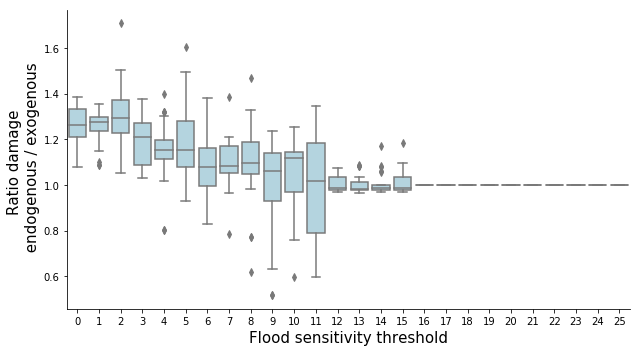

In [2]:
f, axarr = plt.subplots(figsize=(9,5))
bp0  = sns.boxplot(x="floodLUThres", y="DamCumFloat_i_0", data=results_df, ax=axarr, color='lightblue')
bp0.set_xlabel('Flood sensitivity threshold', fontsize=15)
bp0.set_ylabel("Ratio damage \n endogenous / exogenous", fontsize=15)
bp0  = sns.despine()

plt.tight_layout()

plt.show()